<a href="https://colab.research.google.com/github/nilarghadevkaran89-commits/projects/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


<Figure size 800x600 with 0 Axes>

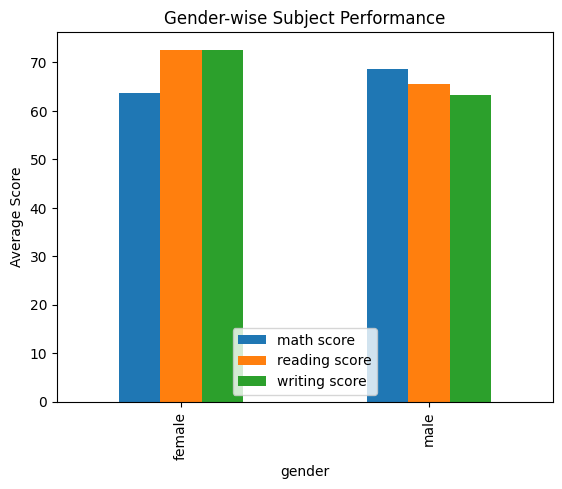

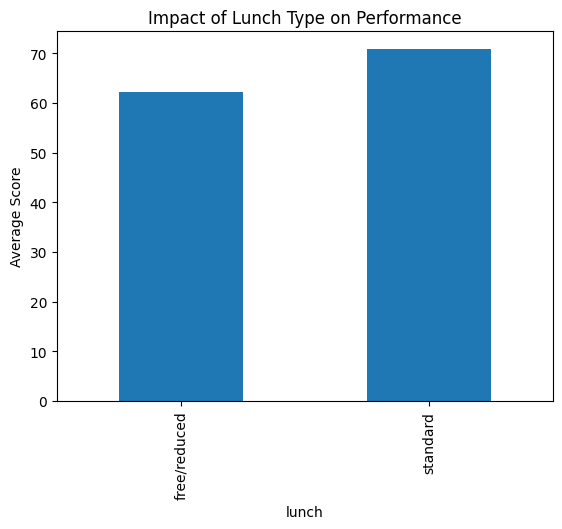

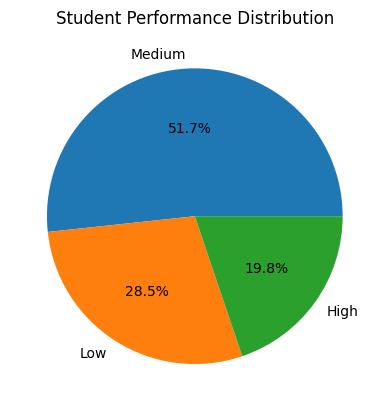

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load Data
# Load the StudentsPerformance.csv dataset into a pandas DataFrame.
df = pd.read_csv("/content/StudentsPerformance (1).csv")

# Display basic information about the DataFrame, including data types and non-null values.
print(df.info())

# Create an 'average_score' column by calculating the mean of 'math score', 'reading score', and 'writing score'.
# 'axis=1' ensures the mean is calculated across columns for each row (student).
df["average_score"] = df[
    ["math score", "reading score", "writing score"]
].mean(axis=1)

# Define a function to categorize student performance based on their average score.
def performance_category(avg):
    if avg >= 80:
        return "High"
    elif avg >= 60:
        return "Medium"
    else:
        return "Low"

# Apply the performance_category function to the 'average_score' column to create a new 'Performance' column.
df["Performance"] = df["average_score"].apply(performance_category)

# 3. Gender-based comparison
# Group the DataFrame by 'gender' and calculate the average scores for each subject.
gender_avg = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

# Create a figure for the plot with a specified size.
plt.figure(figsize=(8,6))
# Plot the gender-wise average scores as a bar chart.
gender_avg.plot(kind="bar")
plt.title("Gender-wise Subject Performance")
plt.ylabel("Average Score")
plt.show()

# 4. Lunch impact analysis
# Group the DataFrame by 'lunch' type and calculate the average overall score.
lunch_avg = df.groupby("lunch")["average_score"].mean()

# Create a figure for the plot.
plt.figure()
# Plot the impact of lunch type on performance as a bar chart.
lunch_avg.plot(kind="bar")
plt.title("Impact of Lunch Type on Performance")
plt.ylabel("Average Score")
# Rotate x-axis labels to prevent overlap if necessary (set to 0 for no rotation).
plt.show()

# 5. Performance distribution
# Count the occurrences of each performance category (High, Medium, Low).
performance_count = df["Performance"].value_counts()

# Create a figure for the plot.
plt.figure()
# Plot the performance distribution as a pie chart with percentage labels.
performance_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Student Performance Distribution")
plt.ylabel("") # Remove the default 'Performance' label from the y-axis.
plt.show()


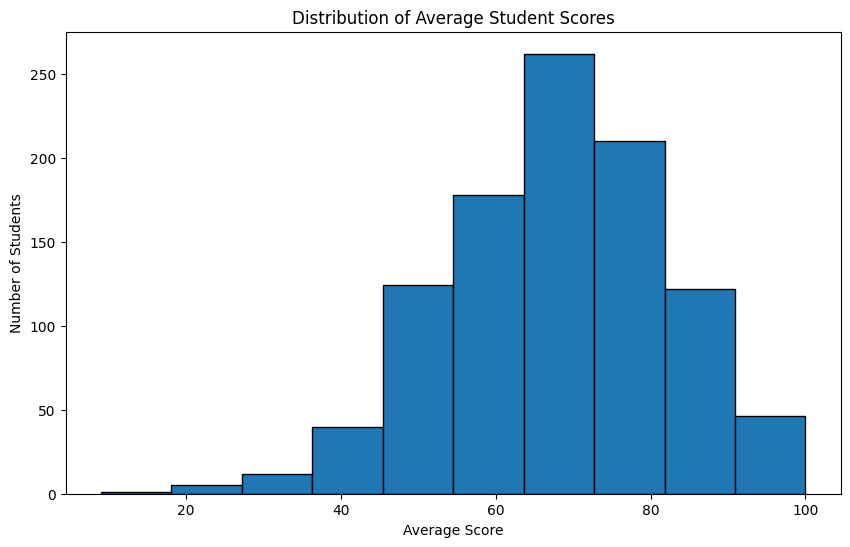

In [9]:
# Create a histogram for 'average_score'
plt.figure(figsize=(10, 6))
plt.hist(df['average_score'], bins=10, edgecolor='black') # Using plt.hist for histogram, added edgecolor for clarity
plt.title('Distribution of Average Student Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()

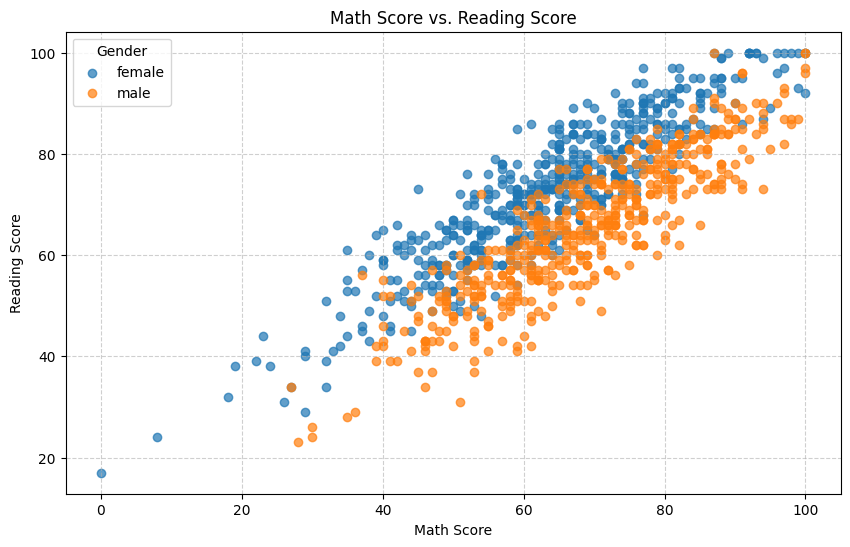

In [8]:
# Create a scatter plot for 'math score' vs 'reading score'
plt.figure(figsize=(10, 6))

# Get unique genders for coloring
for gender_val in df['gender'].unique():
    subset = df[df['gender'] == gender_val]
    plt.scatter(subset['math score'], subset['reading score'], label=gender_val, alpha=0.7)

plt.title('Math Score vs. Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender') # Add a legend for gender
plt.show()